Pandas Data Structure

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

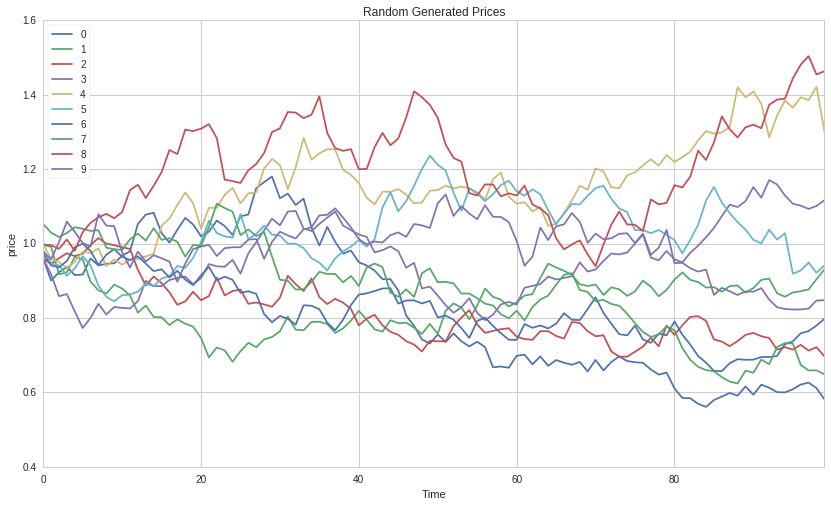

In [40]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices =returns.cumprod()
prices.plot()
plt.title('Random Generated Prices')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend(loc=0)
plt.show()

In [41]:
s = pd.Series([1, 2, np.nan, 4, 5])

s.name = 'Toy series'
print (s.name) 

Toy series


In [42]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print (new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [43]:

print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


In [44]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

0    1.0
1    2.0
2    NaN
3    4.0
Name: Toy series, dtype: float64

In [45]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
prices.head(5)

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: Equity(28016 [CMG]), dtype: float64

In [46]:
print 'Old name: ', prices.name
prices.name = symbol
print 'New name: ', prices.name

Old name:  Equity(28016 [CMG])
New name:  CMG


In [47]:
print prices.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns, UTC]', length=1006, freq='C')


In [48]:
monthly_prices = prices.resample('M')
monthly_prices.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  


2012-01-31 00:00:00+00:00    354.812100
2012-02-29 00:00:00+00:00    379.582000
2012-03-31 00:00:00+00:00    406.996182
2012-04-30 00:00:00+00:00    422.818500
2012-05-31 00:00:00+00:00    405.811091
2012-06-30 00:00:00+00:00    403.068571
2012-07-31 00:00:00+00:00    353.849619
2012-08-31 00:00:00+00:00    294.516522
2012-09-30 00:00:00+00:00    326.566316
2012-10-31 00:00:00+00:00    276.545333
Freq: M, Name: CMG, dtype: float64

In [49]:
monthly_prices_med = prices.resample('M', how = 'median')
monthly_prices_med.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  """Entry point for launching an IPython kernel.


2012-01-31 00:00:00+00:00    355.380
2012-02-29 00:00:00+00:00    378.295
2012-03-31 00:00:00+00:00    408.850
2012-04-30 00:00:00+00:00    420.900
2012-05-31 00:00:00+00:00    405.390
2012-06-30 00:00:00+00:00    402.790
2012-07-31 00:00:00+00:00    380.370
2012-08-31 00:00:00+00:00    295.380
2012-09-30 00:00:00+00:00    332.990
2012-10-31 00:00:00+00:00    286.440
Freq: M, Name: CMG, dtype: float64

In [50]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """


2012-01-31 00:00:00+00:00    340.98
2012-02-29 00:00:00+00:00    370.84
2012-03-31 00:00:00+00:00    394.58
2012-04-30 00:00:00+00:00    418.65
2012-05-31 00:00:00+00:00    419.78
2012-06-30 00:00:00+00:00    397.14
2012-07-31 00:00:00+00:00    382.97
2012-08-31 00:00:00+00:00    280.60
2012-09-30 00:00:00+00:00    285.91
2012-10-31 00:00:00+00:00    316.13
Freq: M, Name: CMG, dtype: float64

adjust the time zone 

In [51]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

2012-01-02 19:00:00-05:00    340.980
2012-01-03 19:00:00-05:00    348.740
2012-01-04 19:00:00-05:00    349.990
2012-01-05 19:00:00-05:00    348.950
2012-01-08 19:00:00-05:00    339.522
2012-01-09 19:00:00-05:00    340.700
2012-01-10 19:00:00-05:00    347.330
2012-01-11 19:00:00-05:00    347.830
2012-01-12 19:00:00-05:00    354.390
2012-01-16 19:00:00-05:00    353.610
Freq: C, Name: CMG, dtype: float64

The data that we get_pricing() only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities. First let's create a new DatetimeIndex that contains all that we want.

In [52]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print calendar_dates

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


In [53]:
calendar_prices = prices.reindex(calendar_dates, method = 'ffill')
calendar_prices.head(10)

2012-01-01 00:00:00+00:00        NaN
2012-01-02 00:00:00+00:00        NaN
2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
Freq: D, Name: CMG, dtype: float64

In [54]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(15)

2012-01-01 00:00:00+00:00    501.05836
2012-01-02 00:00:00+00:00    501.05836
2012-01-03 00:00:00+00:00    340.98000
2012-01-04 00:00:00+00:00    348.74000
2012-01-05 00:00:00+00:00    349.99000
2012-01-06 00:00:00+00:00    348.95000
2012-01-07 00:00:00+00:00    348.95000
2012-01-08 00:00:00+00:00    348.95000
2012-01-09 00:00:00+00:00    339.52200
2012-01-10 00:00:00+00:00    340.70000
2012-01-11 00:00:00+00:00    347.33000
2012-01-12 00:00:00+00:00    347.83000
2012-01-13 00:00:00+00:00    354.39000
2012-01-14 00:00:00+00:00    354.39000
2012-01-15 00:00:00+00:00    354.39000
Freq: D, Name: CMG, dtype: float64

We could simply drop the missing data using the dropna() method. This is much better alternative than filling NaN values in with arbitrary numbers.

In [55]:
droped_prices = calendar_prices.dropna()
droped_prices.head(15)

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
2012-01-11 00:00:00+00:00    347.330
2012-01-12 00:00:00+00:00    347.830
2012-01-13 00:00:00+00:00    354.390
2012-01-14 00:00:00+00:00    354.390
2012-01-15 00:00:00+00:00    354.390
2012-01-16 00:00:00+00:00    354.390
2012-01-17 00:00:00+00:00    353.610
Freq: D, Name: CMG, dtype: float64

Time Series Analysis with pandas

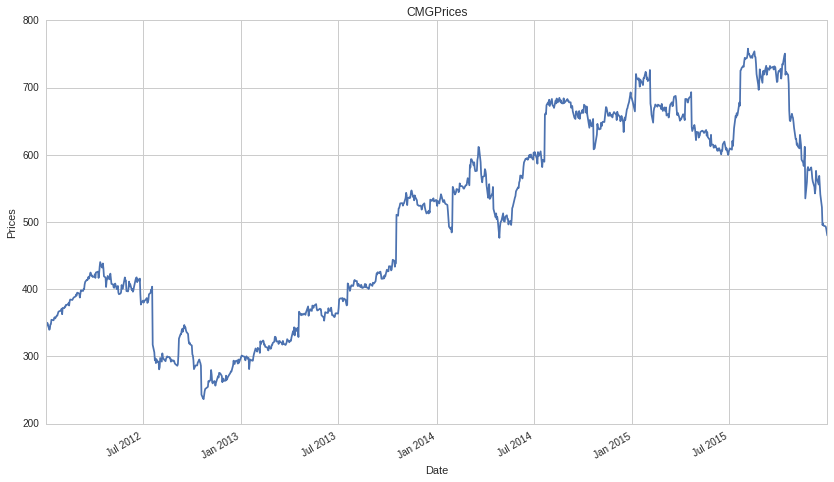

In [56]:
prices.plot()

plt.title(symbol + "Prices")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.show()

In [57]:
print "Mean: ", prices.mean()
print "Standard deviation: ", prices.std()

Mean:  501.6374393638171
Standard deviation:  146.69720414599774


In [58]:
print "Summary Statistics"
print prices.describe()

Summary Statistics
count    1006.000000
mean      501.637439
std       146.697204
min       236.240000
25%       371.605000
50%       521.280000
75%       646.753750
max       757.770000
Name: CMG, dtype: float64


In [59]:
modified_prices = prices * 2 - 10
modified_prices.head()

2012-01-03 00:00:00+00:00    671.960
2012-01-04 00:00:00+00:00    687.480
2012-01-05 00:00:00+00:00    689.980
2012-01-06 00:00:00+00:00    687.900
2012-01-09 00:00:00+00:00    669.044
Freq: C, Name: CMG, dtype: float64

And we can create linear combinations of Series themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new Series.

In [60]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index = prices.index) + 20
noisy_prices.head(15)

2012-01-03 00:00:00+00:00    356.386121
2012-01-04 00:00:00+00:00    344.513915
2012-01-05 00:00:00+00:00    354.109839
2012-01-06 00:00:00+00:00    325.352908
2012-01-09 00:00:00+00:00    320.094740
2012-01-10 00:00:00+00:00    404.077576
2012-01-11 00:00:00+00:00    392.226580
2012-01-12 00:00:00+00:00    355.223453
2012-01-13 00:00:00+00:00    385.792962
2012-01-17 00:00:00+00:00    421.197163
2012-01-18 00:00:00+00:00    407.915446
2012-01-19 00:00:00+00:00    404.060402
2012-01-20 00:00:00+00:00    409.878528
2012-01-23 00:00:00+00:00    424.224025
2012-01-24 00:00:00+00:00    368.192319
Freq: C, dtype: float64

In [61]:
empty_series = prices + pd.Series(np.random.normal(0, 5, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00+00:00   NaN
2012-01-04 00:00:00+00:00   NaN
2012-01-05 00:00:00+00:00   NaN
2012-01-06 00:00:00+00:00   NaN
2012-01-09 00:00:00+00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [62]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

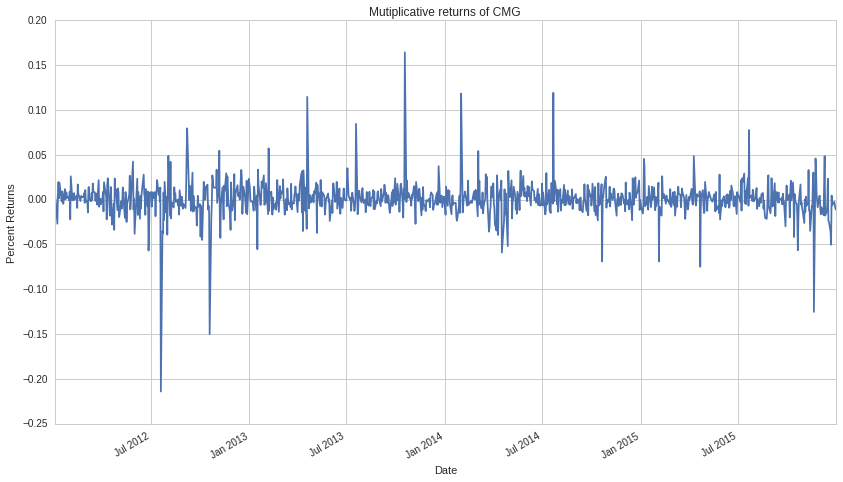

In [63]:
plt.title("Mutiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot()
plt.show()

In [64]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30 day rolling_mean"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


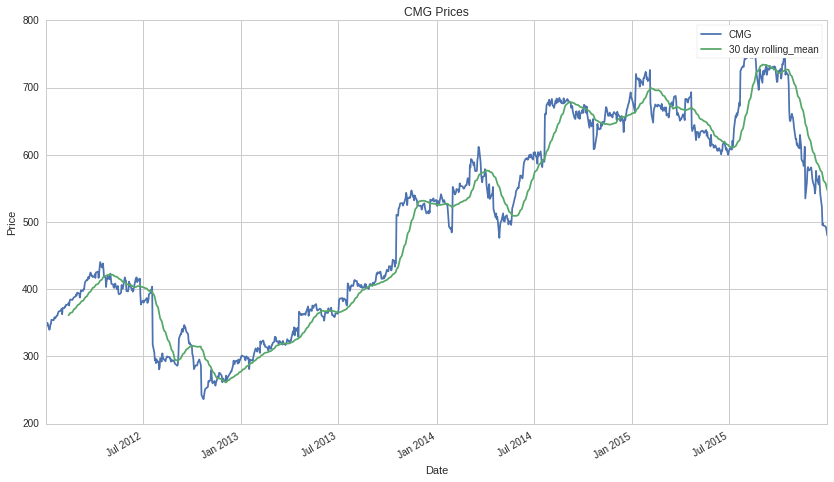

In [65]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + " Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [66]:
rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "30-day rolling volatility"

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  """Entry point for launching an IPython kernel.


Many NumPy functions will work on Series the same way that they work on 1-dimensional NumPy arrays.

In [70]:
print mult_returns.median()

0.0001604466835671836


In [72]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print dict_data

{'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([ 1.25777575, -2.43158387, -2.72020604, -1.17179831,  1.78715833]), 'a': [1, 2, 3, 4, 5]}


In [75]:
df = pd.DataFrame(dict_data, index = pd.date_range('2016-01-01', periods = 5))
print df

            a  b         c
2016-01-01  1  L  1.257776
2016-01-02  2  K -2.431584
2016-01-03  3  J -2.720206
2016-01-04  4  M -1.171798
2016-01-05  5  Z  1.787158


In [78]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance (symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    price.name = symbol

In [79]:
prices.CMG.head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

In [80]:
prices.loc[:, 'CMG'].head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

In [81]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
2012-01-03 00:00:00+00:00,340.980,86.631
2012-01-04 00:00:00+00:00,348.740,87.166
2012-01-05 00:00:00+00:00,349.990,87.526
2012-01-06 00:00:00+00:00,348.950,88.192
2012-01-09 00:00:00+00:00,339.522,87.342


In [84]:
prices.loc[prices.MCD > prices.WFM].head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323


In [88]:
sl = get_pricing('TSLA', start_date = start, end_date = end, fields = 'price')
prices.loc[:, 'TSLA'] = sl
prices.head()

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788,28.06
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650,27.71
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257,27.12
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319,26.94
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323,27.21


In [89]:
prices = prices.drop('TSLA', axis = 1)
prices.head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323


In [90]:
df_1 = get_pricing(['SPY', 'VXX'], start_date = start, end_date = end, fields = 'price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date = start, end_date = end, fields ='price')
df_3 = pd.concat([df_1, df_2], axis = 1)
df_3.head()

,Equity(8554 [SPY]),Equity(51653 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2012-01-03 00:00:00+00:00,118.414,NaN,23.997,54.684,NaN
2012-01-04 00:00:00+00:00,118.498,NaN,24.498,54.995,NaN
2012-01-05 00:00:00+00:00,118.850,NaN,24.749,55.597,NaN
2012-01-06 00:00:00+00:00,118.600,NaN,25.151,56.194,NaN
2012-01-09 00:00:00+00:00,118.795,NaN,24.811,56.098,NaN


Missing data

In [91]:
bfilled_prices = prices.fillna(method = 'bfill')
bfilled_prices.head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,45.76,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,45.76,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,45.76,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,45.76,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,45.76,34.323


we simply just drop the missing value

In [92]:
droped_prices = prices.dropna()
droped_prices.head()

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,89.331,45.76,51.583
2015-02-02 00:00:00+00:00,712.69,89.418,43.50,52.623
2015-02-03 00:00:00+00:00,726.07,90.791,44.87,52.880
2015-02-04 00:00:00+00:00,675.99,90.887,41.32,53.138
2015-02-05 00:00:00+00:00,670.57,91.177,42.46,52.851


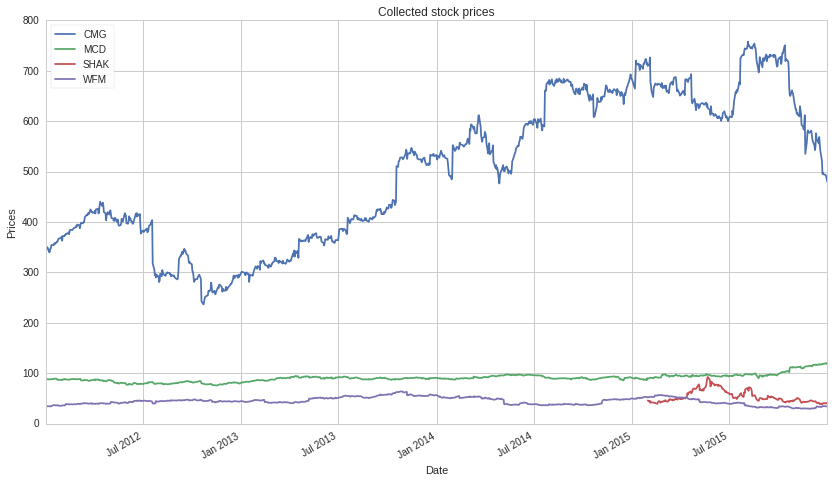

In [93]:
prices.plot()
plt.title('Collected stock prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

In [94]:
prices.mean(axis = 0)

CMG     501.637439
MCD      90.433999
SHAK     53.530670
WFM      44.423044
dtype: float64

In [95]:
prices.std(axis = 0)

CMG     146.697204
MCD       7.672937
SHAK     11.948689
WFM       7.550077
dtype: float64

In [96]:
prices.describe()

/venvs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CMG,MCD,SHAK,WFM
count,1006.000000,1006.000000,233.000000,1006.000000
mean,501.637439,90.433999,53.530670,44.423044
std,146.697204,7.672937,11.948689,7.550077
min,236.240000,75.387000,38.205000,29.150000
25%,371.605000,86.798000,NaN,38.555250
50%,521.280000,90.062000,NaN,43.928000
75%,646.753750,93.976250,NaN,50.766000
max,757.770000,120.030000,92.470000,63.732000


In [97]:
(2 * prices - 50).head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,631.960,123.262,NaN,15.576
2012-01-04 00:00:00+00:00,647.480,124.332,NaN,17.300
2012-01-05 00:00:00+00:00,649.980,125.052,NaN,18.514
2012-01-06 00:00:00+00:00,647.900,126.384,NaN,18.638
2012-01-09 00:00:00+00:00,629.044,124.684,NaN,18.646


Here we use the pct_change() method to get a DataFrame of the multiplicative returns of the securities that we are looking at.

In [99]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFM
2012-01-04 00:00:00+00:00,0.022758,0.006176,NaN,0.026290
2012-01-05 00:00:00+00:00,0.003584,0.004130,NaN,0.018039
2012-01-06 00:00:00+00:00,-0.002972,0.007609,NaN,0.001810
2012-01-09 00:00:00+00:00,-0.027018,-0.009638,NaN,0.000117
2012-01-10 00:00:00+00:00,0.003470,0.000401,NaN,-0.002884


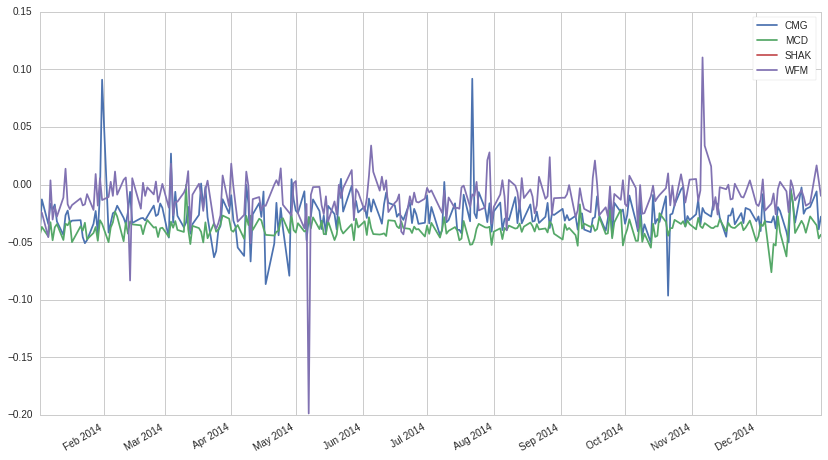

In [100]:
norm_returns = (mult_returns - mult_returns.mean(axis = 0)/mult_returns.std(axis =0))
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

In [101]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.columns = prices.columns

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


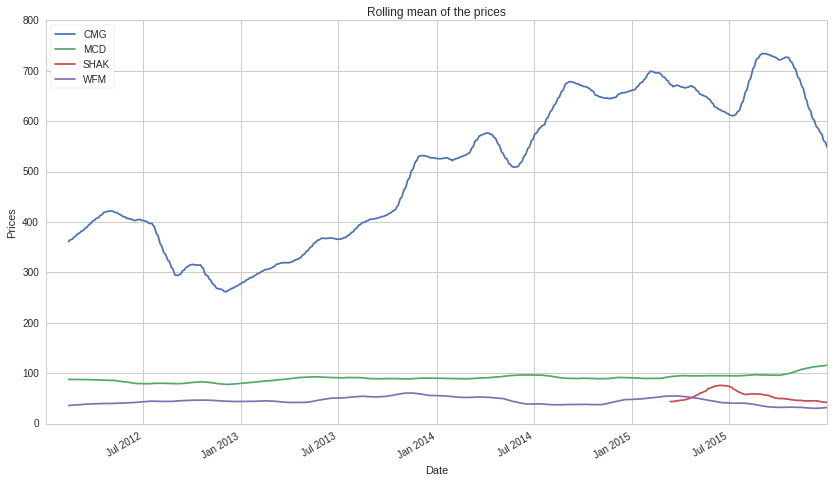

In [102]:
rolling_mean.plot()
plt.title("Rolling mean of the prices")
plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()